In [1034]:
# Existe alguma relação entre a concentração de CO entre os dias da semana?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_csv("../data/AirQualityUCI.csv", delimiter=";")

In [3]:
timeCo2 = data[['Date', 'CO(GT)']]

In [1097]:
# Remover valor -200, possivel erro de leitura
timeCo2 = timeCo2[timeCo2['CO(GT)'] != '-200']
timeCo2 = timeCo2[timeCo2['CO(GT)'] != '-200,0']

# Remover none
timeCo2 = timeCo2.dropna()

In [1099]:
# Converter o valor do CO2 de string para float
timeCo2['CO(GT)'] = timeCo2['CO(GT)'].str.replace(',', '.', regex=False)
timeCo2['CO(GT)'] = timeCo2['CO(GT)'].astype(float)

In [1100]:
# Criar coluna com a data
timeCo2['Date_Converted'] = pd.to_datetime(timeCo2['Date'])
timeCo2['weekday'] = timeCo2['Date_Converted'].dt.day_name()

In [1101]:
# Remover registros após 04/2015 (Dados inconsistentes)
timeCo2 = timeCo2[timeCo2['Date_Converted'] < pd.to_datetime('2005-04-01')]
timeCo2 = timeCo2[timeCo2['Date_Converted'] > pd.to_datetime('2004-03-01')]

In [1102]:
timeCo2.sort_values(by=['Date_Converted'])

,Date,CO(GT),Date_Converted,weekday
558,03/04/2004,1.6,2004-03-04,Thursday
567,03/04/2004,3.1,2004-03-04,Thursday
566,03/04/2004,3.0,2004-03-04,Thursday
565,03/04/2004,2.0,2004-03-04,Thursday
564,03/04/2004,0.9,2004-03-04,Thursday
563,03/04/2004,0.8,2004-03-04,Thursday
562,03/04/2004,0.8,2004-03-04,Thursday
561,03/04/2004,0.9,2004-03-04,Thursday
560,03/04/2004,1.2,2004-03-04,Thursday
559,03/04/2004,1.3,2004-03-04,Thursday


In [1112]:
groupByWeekDay = timeCo2.groupby(['weekday'])
maxPerWeekday = groupByWeekDay['CO(GT)'].max()
minPerWeekday = groupByWeekDay['CO(GT)'].min()
medianPerWeekday = groupByWeekDay['CO(GT)'].median()
name_days = groupByWeekDay['weekday'].max()
groupByWeekDay

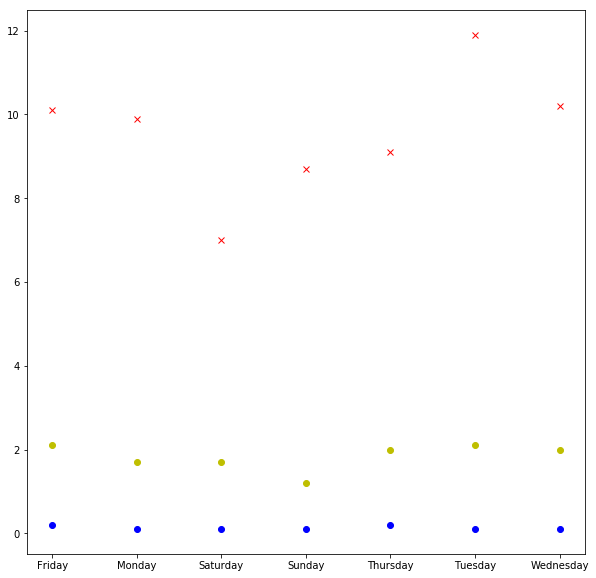

In [1113]:
# plt.rcParams['figure.figsize'] = (10,10)
plt.plot(name_days, maxPerWeekday, 'rx')
plt.plot(name_days, minPerWeekday, 'bo')
plt.plot(name_days, medianPerWeekday, 'yo')
plt.show()

In [ ]:
# Sim, o nível de CO2 é mais baixo aos domingos, na segunda-feira o nível de CO2 começa a subir, 
# de terça a sexta o nível de CO2 continua estável e começa a baixar no sábado.